In [1]:
print("")

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [57]:
from scipy import stats

In [6]:
from datetime import datetime

In [36]:
tech_list = ['AAPL','GOOG','TSLA','AMZN']
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [37]:
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [38]:
"""
AAPL = pd.read_csv('Apple_stock.csv', index_col='Date')
GOOG = pd.read_csv('Google_stock.csv', index_col='Date')
MSFT = pd.read_csv('MicroSoft_stock.csv', index_col='Date')
AMZN = pd.read_csv('Amazon_stock.csv', index_col='Date')"""

"\nAAPL = pd.read_csv('Apple_stock.csv', index_col='Date')\nGOOG = pd.read_csv('Google_stock.csv', index_col='Date')\nMSFT = pd.read_csv('MicroSoft_stock.csv', index_col='Date')\nAMZN = pd.read_csv('Amazon_stock.csv', index_col='Date')"

In [39]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-10,135.098999,138.639999,133.140503,138.574005,138.574005,34096000
2022-01-11,138.180496,140.329498,136.813507,140.017502,140.017502,23502000
2022-01-12,141.554504,142.814255,141.112000,141.647995,141.647995,23642000
2022-01-13,141.840500,143.185501,138.914001,139.130997,139.130997,26566000
2022-01-14,137.500000,141.200500,137.500000,139.786499,139.786499,23826000


In [40]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,153.920520,156.024200,151.801120,153.955480,153.520856,8.781345e+07
std,13.121911,13.010978,13.199822,13.185141,12.979849,2.371325e+07
min,126.010002,127.769997,124.169998,125.019997,125.019997,3.519590e+07
25%,143.484997,146.572502,141.115005,143.757500,143.385052,7.227205e+07
50%,152.660004,155.345001,150.855003,152.994995,152.530830,8.342450e+07
75%,165.010002,167.065002,163.007496,165.247494,164.625645,9.632570e+07
max,178.550003,179.610001,176.699997,178.960007,178.154037,1.826020e+08


In [41]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-01-10 to 2023-01-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<AxesSubplot: xlabel='Date'>

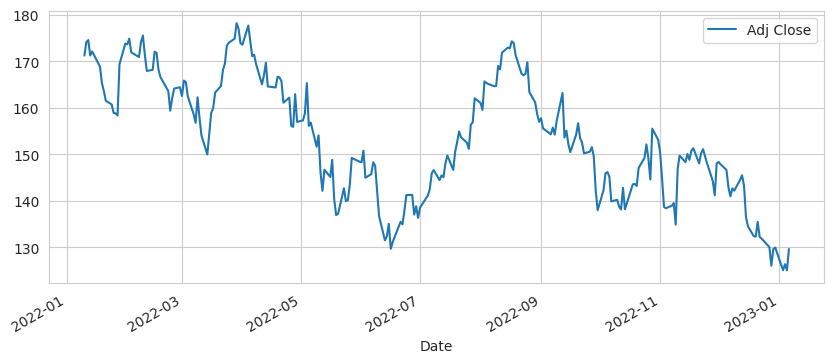

In [42]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot: xlabel='Date'>

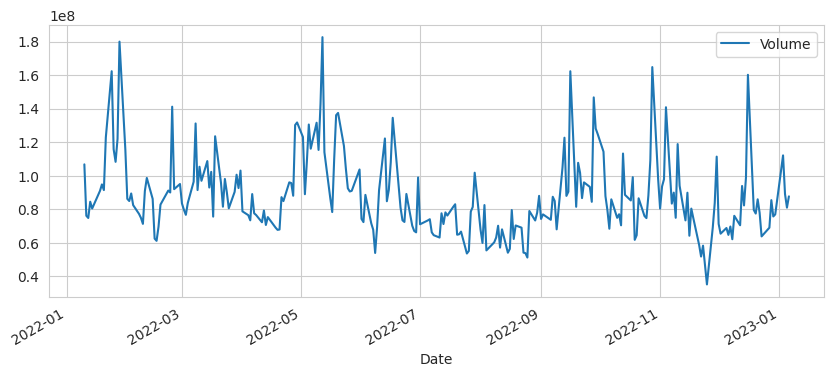

In [43]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [44]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))

    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot: xlabel='Date'>

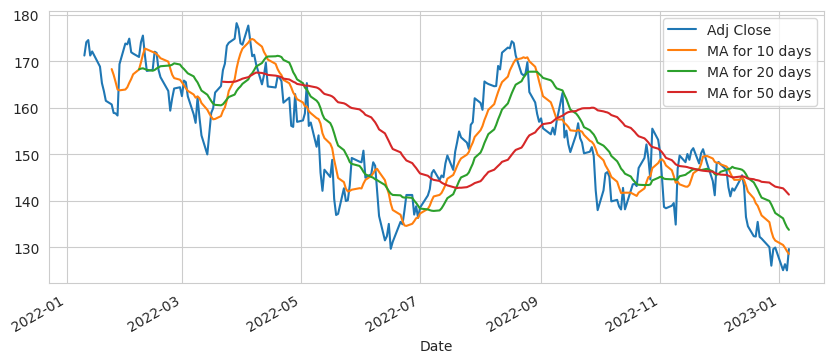

In [45]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot: xlabel='Date'>

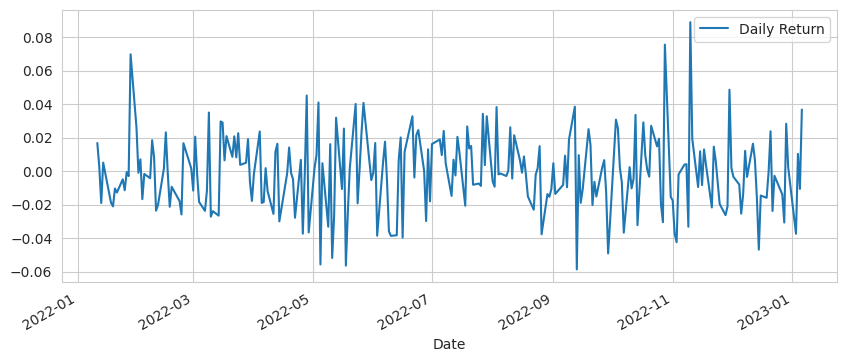

In [46]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True)

<AxesSubplot: xlabel='Daily Return', ylabel='Count'>

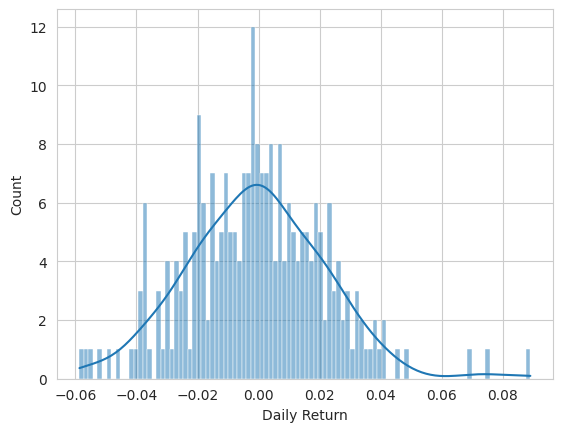

In [47]:
sns.histplot(data=AAPL['Daily Return'].dropna(),bins=100,kde=True)

<AxesSubplot: >

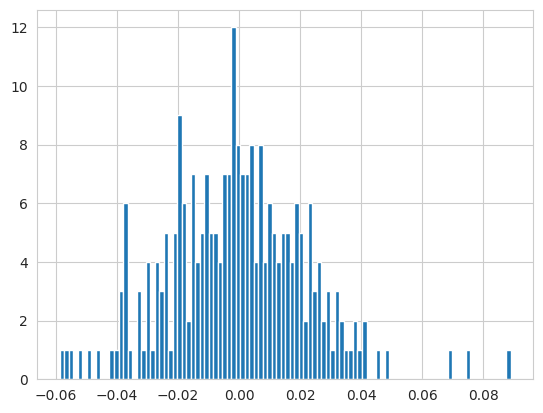

In [48]:
AAPL['Daily Return'].hist(bins=100)

In [49]:
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [50]:
closing_df.head()

,AAPL,AMZN,GOOG,TSLA
Date,,,,
2022-01-10,171.196411,161.485992,138.574005,352.706665
2022-01-11,174.069733,165.362000,140.017502,354.799988
2022-01-12,174.517136,165.207001,141.647995,368.739990
2022-01-13,171.196411,161.214005,139.130997,343.853333
2022-01-14,172.071350,162.138000,139.786499,349.869995


In [51]:
tech_rets = closing_df.pct_change()

In [52]:
tech_rets.head()

,AAPL,AMZN,GOOG,TSLA
Date,,,,
2022-01-10,NaN,NaN,NaN,NaN
2022-01-11,0.016784,0.024002,0.010417,0.005935
2022-01-12,0.002570,-0.000937,0.011645,0.039290
2022-01-13,-0.019028,-0.024170,-0.017769,-0.067491
2022-01-14,0.005111,0.005731,0.004711,0.017498


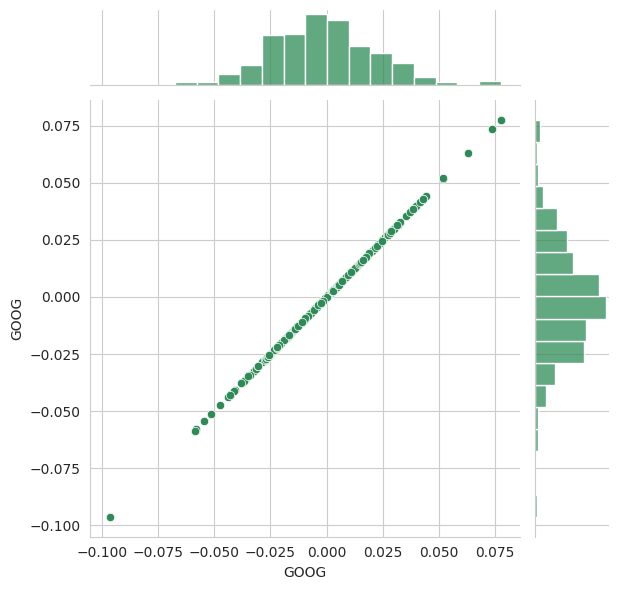

In [54]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

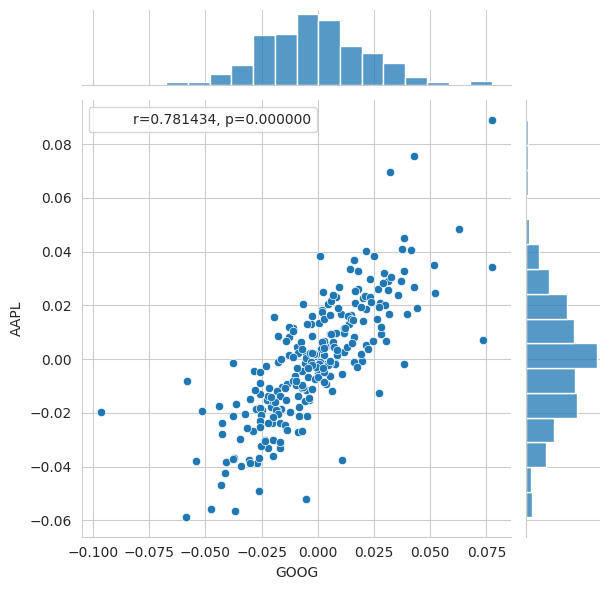

In [60]:
graph = sns.jointplot(x='GOOG',y='AAPL',data=tech_rets,kind='scatter')
r, p = stats.pearsonr(tech_rets['GOOG'].dropna(), tech_rets['AAPL'].dropna())
# if you choose to write your own legend, then you should adjust the properties then
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

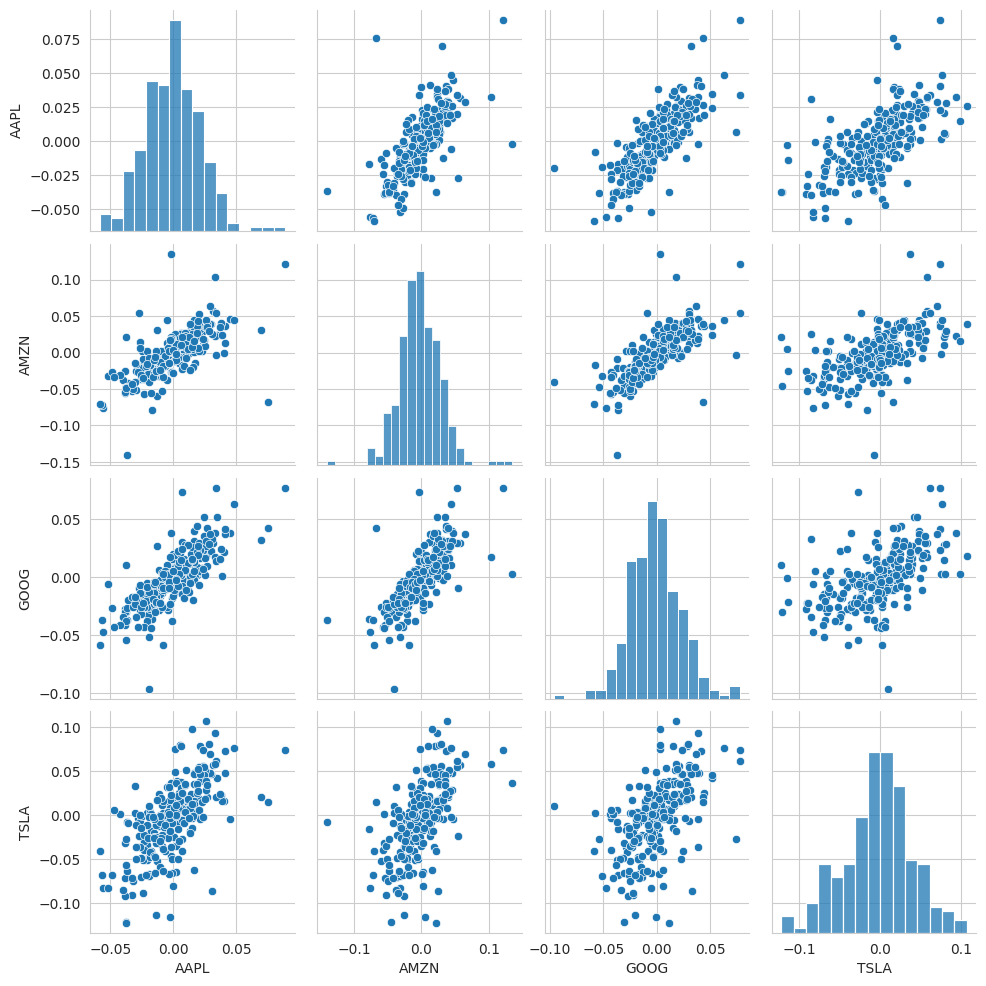

In [61]:
sns.pairplot(tech_rets.dropna())

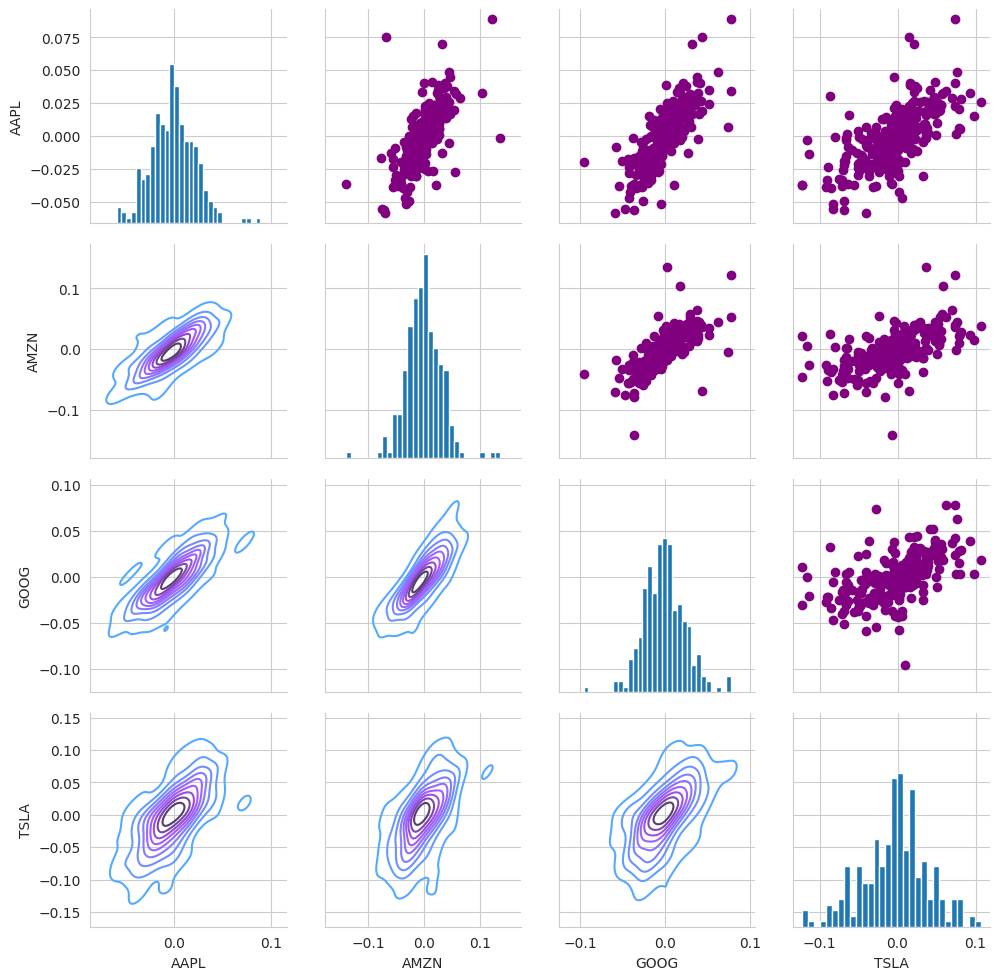

In [62]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

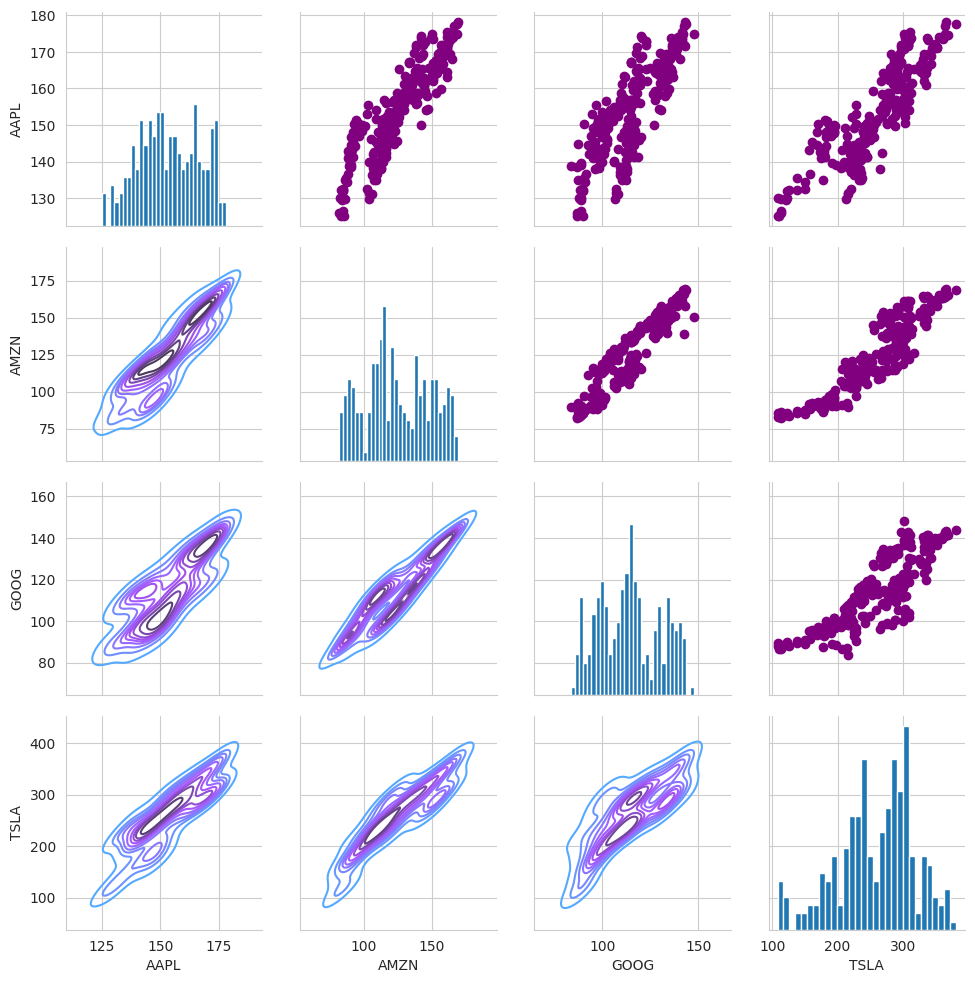

In [63]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

In [66]:
sns.corrplot(tech_rets.dropna(),annot=True)

AttributeError: module 'seaborn' has no attribute 'corrplot'